In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import logging
from pathlib import Path

from hb_mep.config import HBMepConfig
from hb_mep.data_access import DataClass
from hb_mep.models.baseline import Baseline
from hb_mep.utils import plot

PARENT_PATH = Path(os.getcwd()).parent.absolute()
FORMAT = "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
logging.basicConfig(format=FORMAT, level=logging.INFO)

Load config

In [3]:
config = HBMepConfig()
config.CURRENT_PATH = PARENT_PATH

Load data and preprocess

In [4]:
data = DataClass(config)
df, data_dict, encoders_dict = data.build()

2023-02-22 14:28:05,766 - hb_mep.data_access.core - INFO - Reading data ....
2023-02-22 14:28:05,771 - hb_mep.data_access.core - INFO - Processing data ...
2023-02-22 14:28:05,781 - hb_mep.utils.utils - INFO - func:build took: 0.02 sec


In [8]:
data_dict.keys()

dict_keys(['num_participants', 'num_segments', 'segments_per_participant', 'total_combinations', 'intensity', 'Biceps', 'participant', 'level'])

In [9]:
encoders_dict.keys()

dict_keys(['participant_encoder', 'segment_encoder'])

Initialize model

In [10]:
model = Baseline(config)

Run MCMC inference

In [11]:
mcmc, posterior_samples = model.sample(data_dict=data_dict)

2023-02-22 14:29:04,294 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
2023-02-22 14:29:04,295 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-02-22 14:29:04,295 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-02-22 14:29:04,297 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023-02-22 14:29:04,297 - jax._src.lib.xla_bridge - INFO - Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
2023-02-22 14:29:04,298 - jax._src.lib.xla_bridge - WARNING - No GPU/TPU found,

Plot fitted curves

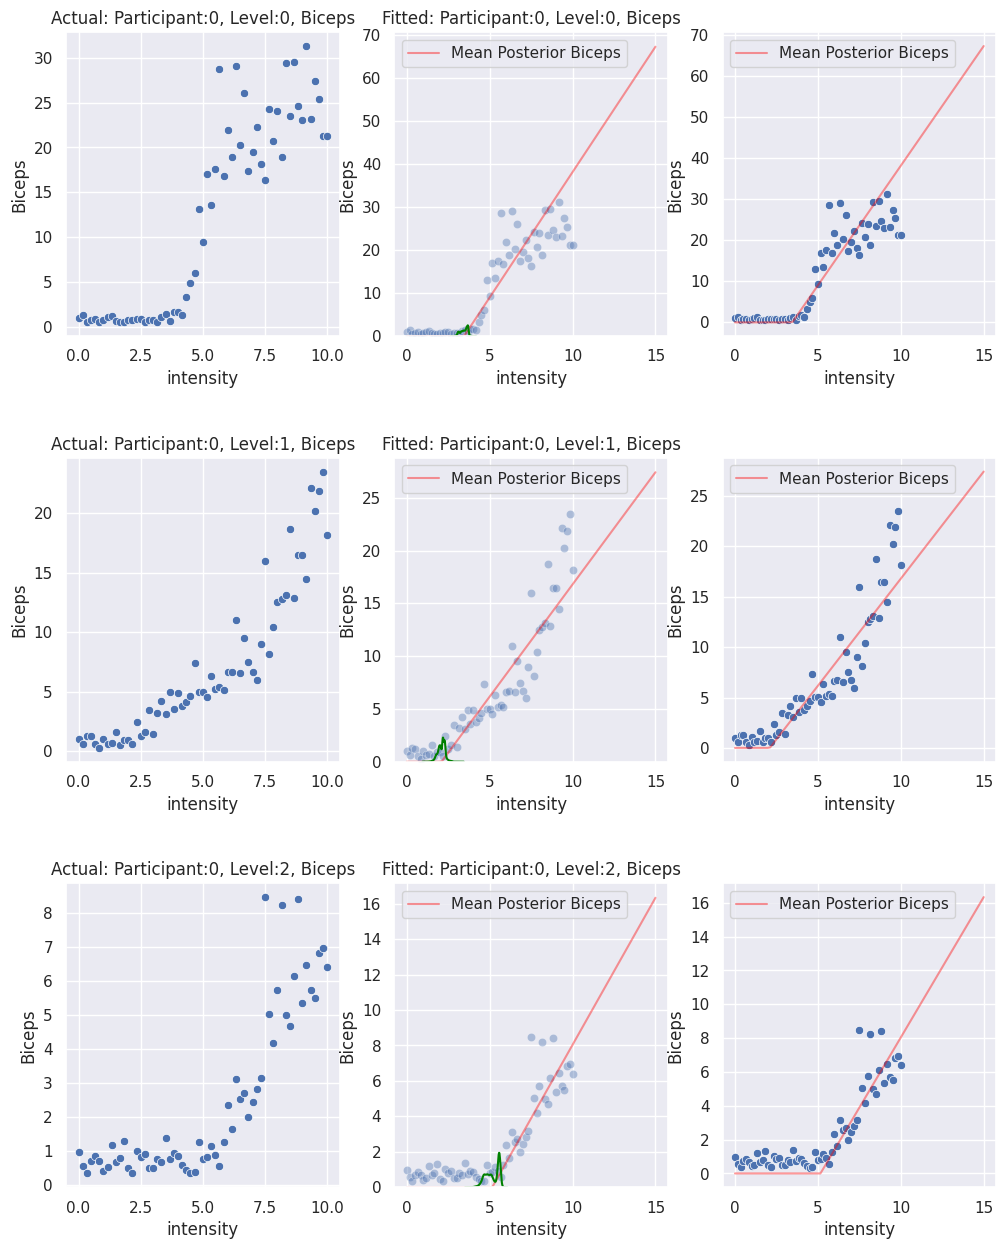

In [12]:
fig = plot(df=df, data_dict=data_dict, encoders_dict=encoders_dict, posterior_samples=posterior_samples)